Аналитики очень любят смотреть на графики. Однажды аналитик ВКонтакте пришёл на работу, открыл графики количества рекламных событий по дням (смотри приложение) и сразу же заметил сильный скачок данных за 11 апреля. 



Давайте поможем аналитику разобраться, что произошло. Какие-то ошибки в сборе статистик, дублирование данных? Или переживать не нужно и такой рост имеет разумное объяснение? 

Задача:
1. Воспроизведите график числа рекламных событий по дням. 
2. Найдите причину резкого увеличения количества рекламных событий и объясните, что произошло. 
З*. Предложите способ, который помог бы автоматически детектировать аномальные изменения метрик на графиках рекламной статистики. Иными словами, предложите алгоритм, который каждое утро анализирует данные за прошедшие сутки, и, если они сильно выбиваются из общего тренда, отправляет аналитику уведомление: на этом графике есть проблема за вчерашний день. Подумайте, как сделать детектор, который проверяет на аномалии каждый час, каждые пять минут в графике? 
Предложите вариант кода, который решает эту задачу. Реализовывать логику нотификации не нужно, только поиск аномального дня, часа, пятиминутки в данных рекламной статистики. 

Немного дополнительной информации о структуре рекламы ВКонтакте. Есть две основные группы рекламодателей: агентства и клиенты. Агентствами являются рекламные кабинеты юридических лиц. Среди клиентов же существуют как клиенты этих самых агентств, так и автономные рекламные кабинеты физических лиц, над которыми нет агентств. Рекламные кампании — это наборы рекламных объявлений. Они есть в каждом кабинете. 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Data.csv',parse_dates=True)

In [5]:
df.time = pd.to_datetime(df.time, unit='s')

In [6]:
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,2019-04-08 17:22:25,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,2019-04-12 21:10:58,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,2019-04-16 08:16:41,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,2019-04-09 15:07:59,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,2019-04-11 07:11:57,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [7]:
df['date'].value_counts()

2019-04-11    18259
2019-04-13    10999
2019-04-12    10740
2019-04-08     8902
2019-04-14     8656
2019-04-09     7963
2019-04-16     7766
2019-04-15     7457
2019-04-10     7098
2019-04-03     5357
2019-04-05     5305
2019-04-02     5269
2019-04-01     5172
2019-04-04     5108
2019-04-07     4091
2019-04-06     3955
Name: date, dtype: int64

In [8]:
df2 = df.groupby(['date'])['time'].count()

In [9]:
df2.head(50)

date
2019-04-01     5172
2019-04-02     5269
2019-04-03     5357
2019-04-04     5108
2019-04-05     5305
2019-04-06     3955
2019-04-07     4091
2019-04-08     8902
2019-04-09     7963
2019-04-10     7098
2019-04-11    18259
2019-04-12    10740
2019-04-13    10999
2019-04-14     8656
2019-04-15     7457
2019-04-16     7766
Name: time, dtype: int64

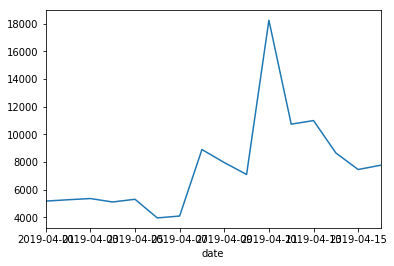

In [11]:
df2.plot(x='date')

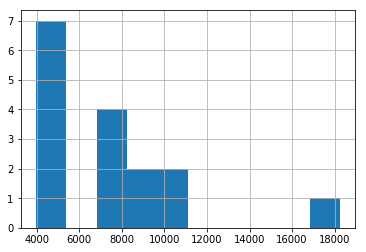

In [12]:
df2.hist()

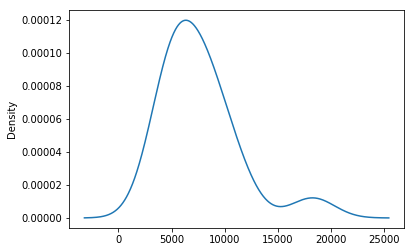

In [13]:
df2.plot(kind='kde')

In [42]:
df.groupby(['date','event']).count().head()

time  ad_cost_type  has_video  agency_union_id  \
date       event                                                    
2019-04-01 click   1827          1827       1827             1827   
           report   362           362        362              362   
           view    2983          2983       2983             2983   
2019-04-02 click   1898          1898       1898             1898   
           report   366           366        366              366   

                   client_union_id  campaign_union_id  ad_id  platform  
date       event                                                        
2019-04-01 click              1827               1827   1827      1827  
           report              362                362    362       362  
           view               2983               2983   2983      2983  
2019-04-02 click              1898               1898   1898      1898  
           report              366                366    366       366

In [40]:
df.groupby(['date','ad_id']).agg({'date':'first','ad_id':'count'}).head()

date  ad_id
date       ad_id                       
2019-04-01 ad_1       2019-04-01      9
           ad_10008   2019-04-01      1
           ad_10010   2019-04-01      1
           ad_100220  2019-04-01     24
           ad_10032   2019-04-01      2

In [51]:
df.groupby(['ad_id']).agg({'date':'count'}).head()

,date
ad_id,
ad_1,123
ad_10003,5
ad_10008,2
ad_10010,1
ad_10011,1


In [57]:
df3 = df[df.date=='2019-04-01']

In [59]:
df3.size

51720

In [61]:
df3.ad_id.value_counts()

ad_7701      197
ad_99643     102
ad_106256     78
ad_97427      55
ad_3024       53
ad_5131       53
ad_34238      44
ad_10361      33
ad_35577      33
ad_106430     32
ad_24038      32
ad_10795      31
ad_102873     30
ad_18849      29
ad_102864     29
ad_17074      28
ad_106529     28
ad_8339       28
ad_115272     25
ad_97293      25
ad_6308       24
ad_106576     24
ad_6302       24
ad_100220     24
ad_118032     23
ad_24278      20
ad_121378     19
ad_11647      18
ad_4210       18
ad_119683     17
            ... 
ad_34892       1
ad_38127       1
ad_104344      1
ad_45622       1
ad_41661       1
ad_27299       1
ad_116971      1
ad_43913       1
ad_41077       1
ad_20498       1
ad_111304      1
ad_98797       1
ad_121619      1
ad_41708       1
ad_12684       1
ad_121677      1
ad_46863       1
ad_43493       1
ad_18710       1
ad_104854      1
ad_12170       1
ad_45577       1
ad_45875       1
ad_32829       1
ad_45827       1
ad_117406      1
ad_11391       1
ad_45216      